In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import seaborn as sns

In [2]:
n = 1000 # datapoints
p = 10 # features
X = np.random.normal(size=n*p).reshape((n,p))

min_2 = 2+abs(X[:, 2].min())

y = 0.6*X[:, 0] + 0.6*X[:, 1] + np.log(min_2+X[:, 2]) + 0.3*np.random.normal(size=n*1) + (np.add(X[:, 3], X[:, 4]))/5 + np.power(np.absolute(X[:, 5]), 1/3)



In [3]:
pd.DataFrame(np.insert(X, 0, y, axis=1)).head() # insert into X 0th column, y

,0,1,2,3,4,5,6,7,8,9,10
0,4.200870,1.772207,0.449154,0.425330,0.278304,-1.176229,0.883430,-0.401626,-0.445564,-1.436498,-0.493993
1,1.865855,-1.236343,-1.020220,0.821715,-1.775768,0.097291,-1.942655,-0.903883,-0.418883,-0.055944,-0.510393
2,4.246214,1.510853,1.036176,-1.508976,-0.286210,1.579675,-1.700947,1.216180,-0.191709,0.310635,-1.806458
3,3.853245,1.282099,0.956345,-0.607945,-1.435724,1.113200,0.782522,-1.364115,-0.900854,-0.690651,0.852314
4,2.691524,-0.391935,1.377337,-0.068079,0.255891,-1.170791,-0.162980,-1.514086,-0.738030,0.563529,0.129468


In [4]:
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

In [5]:
corrmat

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,0.589809,0.617781,0.150199,0.201663,0.188202,-0.038867,-0.031263,0.034069,0.020907,0.071819
1,0.589809,1.000000,0.004362,-0.009274,-0.006679,-0.033115,0.016620,-0.039359,0.007530,0.018377,0.053523
2,0.617781,0.004362,1.000000,-0.047170,0.002262,-0.005415,-0.009425,0.012901,0.036078,0.007811,0.032853
3,0.150199,-0.009274,-0.047170,1.000000,0.020652,0.006125,0.001303,0.019897,0.054421,0.021229,0.045107
4,0.201663,-0.006679,0.002262,0.020652,1.000000,0.036272,-0.038884,-0.007967,-0.039846,-0.071690,0.051767
5,0.188202,-0.033115,-0.005415,0.006125,0.036272,1.000000,-0.063070,-0.004834,0.030221,-0.007638,0.024382
6,-0.038867,0.016620,-0.009425,0.001303,-0.038884,-0.063070,1.000000,-0.038339,-0.020174,0.008160,-0.014769
7,-0.031263,-0.039359,0.012901,0.019897,-0.007967,-0.004834,-0.038339,1.000000,-0.020645,0.018534,0.089163
8,0.034069,0.007530,0.036078,0.054421,-0.039846,0.030221,-0.020174,-0.020645,1.000000,-0.033094,0.048416
9,0.020907,0.018377,0.007811,0.021229,-0.071690,-0.007638,0.008160,0.018534,-0.033094,1.000000,0.026344


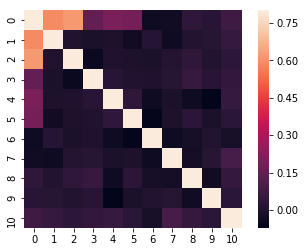

In [6]:
sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

In [7]:
regr = LinearRegression()

In [8]:
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

R-squared regression: 0.8430540328354996


In [10]:
# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=1)

In [11]:
# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

PLSRegression(copy=True, max_iter=500, n_components=1, scale=True, tol=1e-06)

In [12]:
# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

R-squared PLSR: 0.8349578525549064


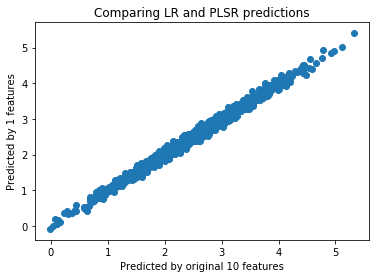

In [13]:
# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 1 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()